 ## HW3 - EuroSAT Land Use and Land Cover Classification using Deep Learning
 
In this homework your task is to implement traditional and DL models to solve a typical problem in satellite imaging  using a benchmark dataset.


### S1: Reading and preparing the data

- Visit the EuroSAT data description page and download the data: https://github.com/phelber/eurosat

- Create input data and labels for training and testing (X_tr, y_tr, X_te, y_te). 

    - We will only use the categories "Forest (F)", "Residential (R)" and "Industrial (I)"

    - The data will be split into training (60%) and testing sets (40%), stratified on class labels (equal percentage of each category in train and test sets)
    
    - The data matrix X will be a 2D matrix with size m x n, where m: number of samples, n: number of flattened image pixels
    
    - Images will be directly read as "grayscale" (single image channel, scaled to values 0 to 1). You can use:
    
    > from skimage import io
    
    > img = io.imread(img_name, as_gray=True)
    
    - The labels will be converted to values 0: Forest, 1:Residential, 2:Industrial


Q1.1: What are the shapes of X_tr, y_tr, X_te and y_te variables?

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras as keras
from matplotlib.pyplot import imread, imshow, subplots, show
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics

In [88]:
#Import EuroSat Data using only Forest, Residential, and Industrial 
path = 'C:/Users/montb/Documents/MUSASpring/Data/EuroSAT_RGB/'

#Use Keras to import data
dataset = keras.utils.image_dataset_from_directory(
    path,
    labels="inferred",
    label_mode="int",
    class_names= ["Forest", "Residential", "Industrial"],
    color_mode="grayscale",
    batch_size=32,
    image_size=(64, 64),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

#Convert keras dataset to numpy array
dataset = dataset.unbatch()
images = np.asarray(list(dataset.map(lambda x, y: x)))
labels = np.asarray(list(dataset.map(lambda x, y: y)))


Found 8500 files belonging to 3 classes.


In [100]:
#flatten images to 2D array
images = images.reshape(images.shape[0], images.shape[1]*images.shape[2])

#Split data into training and testing
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(images, labels, test_size=0.4, random_state=42)

### Print out the shape of one image so that we know what the dimensions of the data are
print()
print("Image Train Shape: {}".format(x_tr.shape))
print("Label Train Shape: {}".format(y_tr.shape))
print("Image Test Shape: {}".format(x_te.shape))
print("Label Test Shape: {}".format(y_te.shape))
print()


Image Train Shape: (5100, 4096)
Label Train Shape: (5100,)
Image Test Shape: (3400, 4096)
Label Test Shape: (3400,)



### S2: Binary classifiers

- Implement three binary SVM classifiers (use a linear kernel and default parameters) to classify [F vs R], [F vs I] and [R vs I]

- Calculate classification accuracy of each classifier on the test data

- Plot the ROC curve of each classifier and calculate the AUC on the test data

Q2.1: What is the classification accuracy of each classifier?

Q2.2: What is the AUC of each classifier?

Q2.3: Show one image that is mis-classified by each classifier.

In [133]:
#subset data to only include Forest and Residential
x_tr_b1 = x_tr[y_tr < 2]
y_tr_b1 = y_tr[y_tr < 2]

x_te_b1 = x_te[y_te < 2]
y_te_b1 = y_te[y_te < 2]

#subset data to only include Forest and Industrial
x_tr_b2 = x_tr[y_tr != 1]
y_tr_b2 = y_tr[y_tr != 1]

x_te_b2 = x_te[y_te != 1]
y_te_b2 = y_te[y_te != 1]

#subset data to only include Residential and Industrial
x_tr_b3 = x_tr[y_tr > 0]
y_tr_b3 = y_tr[y_tr > 0]

x_te_b3 = x_te[y_te > 0]
y_te_b3 = y_te[y_te > 0]

(3278,)

In [174]:
#B1 - Forest vs Residential
#Create SVM model
classifierFR = SVC(kernel='linear', probability=True, random_state=0)
classifierFI = SVC(kernel='linear', probability=True, random_state=0)
classifierRI = SVC(kernel='linear', probability=True, random_state=0)

#Fit model to training data
classifierFR.fit(x_tr_b1, y_tr_b1)

#Predict labels for test data
y_pred_b1 = classifierFR.predict(x_te_b1)

#B2 - Forest vs Industrial
#Fit model to training data
classifierFI.fit(x_tr_b2, y_tr_b2)

#Predict labels for test data
y_pred_b2 = classifierFI.predict(x_te_b2)

#B3 - Residential vs Industrial
#Fit model to training data
classifierRI.fit(x_tr_b3, y_tr_b3)

#Predict labels for test data
y_pred_b3 = classifierRI.predict(x_te_b3)


Accuracy of Forest vs Residential Model: 0.947
Accuracy of Forest vs Industrial Model: 0.996
Accuracy of Residential vs Industrial Model: 0.723


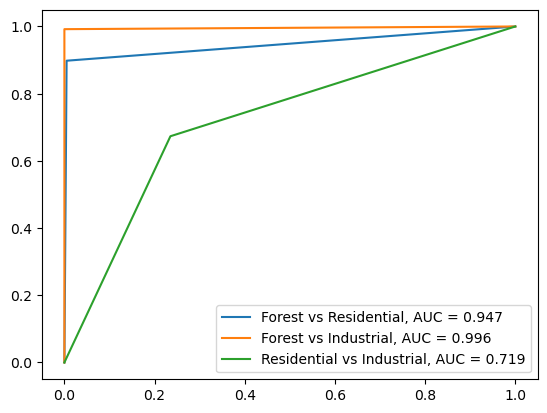

In [192]:
#Calculate accuracy
print("Accuracy of Forest vs Residential Model: {}".format(np.round_(accuracy_score(y_te_b1, y_pred_b1), decimals=3)))
print("Accuracy of Forest vs Industrial Model: {}".format(np.round_(accuracy_score(y_te_b2, y_pred_b2), decimals=3)))
print("Accuracy of Residential vs Industrial Model: {}".format(np.round_(accuracy_score(y_te_b3, y_pred_b3), decimals=3)))

#plot combined ROC curve for all three test sets, add AUC to legend
fpr_b1, tpr_b1, _ = metrics.roc_curve(y_te_b1, y_pred_b1, pos_label=1)
fpr_b2, tpr_b2, _ = metrics.roc_curve(y_te_b2, y_pred_b2, pos_label=2)
fpr_b3, tpr_b3, _ = metrics.roc_curve(y_te_b3, y_pred_b3, pos_label=2)

auc_b1 = metrics.roc_auc_score(y_te_b1, y_pred_b1)
auc_b2 = metrics.roc_auc_score(y_te_b2, y_pred_b2)
auc_b3 = metrics.roc_auc_score(y_te_b3, y_pred_b3)

plt.plot(fpr_b1, tpr_b1, label='Forest vs Residential, AUC = {}'.format(np.round_(auc_b1, decimals=3)))
plt.plot(fpr_b2, tpr_b2, label='Forest vs Industrial, AUC = {}'.format(np.round_(auc_b2, decimals=3)))
plt.plot(fpr_b3, tpr_b3, label='Residential vs Industrial, AUC = {}'.format(np.round_(auc_b3, decimals=3)))

plt.legend(loc='lower right')

Forest: 0, Residential: 1, Industrial: 2


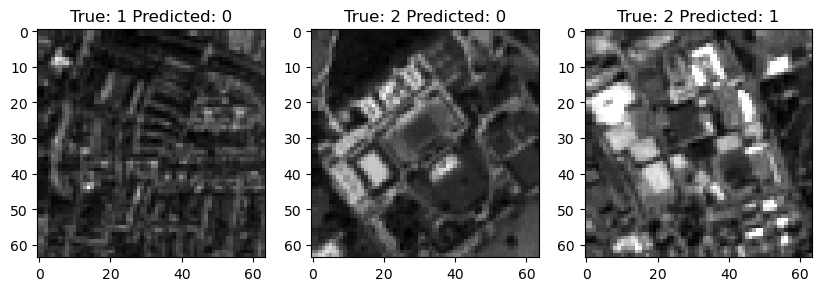

In [171]:
print("Forest: 0, Residential: 1, Industrial: 2")

#Plot misclassified images
fig, ax = plt.subplots(1, 3, figsize=(10, 3))

#Find misclassified images
miss1 = np.where(y_te_b1 != y_pred_b1)[0]
miss2 = np.where(y_te_b2 != y_pred_b2)[0]
miss3 = np.where(y_te_b3 != y_pred_b3)[0]

ax[0].imshow(x_te_b1[miss1[0]].reshape(64, 64), cmap='gray')
ax[0].set_title("True: {} Predicted: {}".format(y_te_b1[miss1[0]], y_pred_b1[miss1[0]]))

ax[1].imshow(x_te_b2[miss2[0]].reshape(64, 64), cmap='gray')
ax[1].set_title("True: {} Predicted: {}".format(y_te_b2[miss2[0]], y_pred_b2[miss2[0]]))

ax[2].imshow(x_te_b3[miss3[0]].reshape(64, 64), cmap='gray')
ax[2].set_title("True: {} Predicted: {}".format(y_te_b3[miss3[0]], y_pred_b3[miss3[0]]))

plt.show()


### S3: Multi-class classifier via majority voting of binary classifiers

- Combine the models trained in S2 to create a 3-class classifier. The combined model will apply each one of the 3 classifiers on the testing data and will apply majority voting to decide the final class of the test sample.

- Calculate classification accuracy of the 3-class classifier on the test data.

Q3.1: What is the classification accuracy of the classifier?


In [176]:
#Create a classifier that takes three SVMs and predicts the class of the image based on the highest probability

from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(estimators=[('FR', classifierFR), ('FI', classifierFI), ('RI', classifierRI)], voting='hard')

#Fit model to training data
ensemble.fit(x_tr, y_tr)

#Predict labels for test data
y_pred = ensemble.predict(x_te)

#Calculate accuracy
print("Accuracy of Ensemble Model: {}".format(np.round_(accuracy_score(y_te, y_pred), decimals=3)))


Accuracy of Ensemble Model: 0.787


### S4: Multi-class Random-Forest classifier

- Train a Random-Forest classifier to classify the data into one of the three classes. Use the training data.

- Apply the trained model on testing data.

Q4.1: What is the classification accuracy of the classifier?

Q4.2: Plot the confusion matrix.



Accuracy of Random Forest Model: 0.916


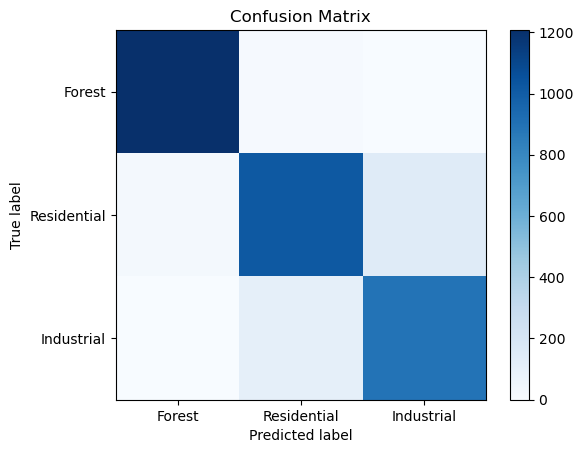

In [177]:
from sklearn.ensemble import RandomForestClassifier

#Create random forest model
rf = RandomForestClassifier(n_estimators=100, random_state=0)

#Fit model to training data
rf.fit(x_tr, y_tr)

#Predict labels for test data
y_pred = rf.predict(x_te)


Accuracy of Random Forest Model: 0.916


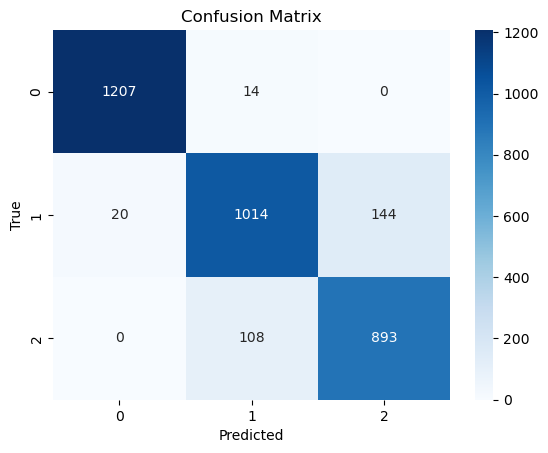

In [181]:
import seaborn as sbn

#Calculate accuracy
print("Accuracy of Random Forest Model: {}".format(np.round_(accuracy_score(y_te, y_pred), decimals=3)))

#Plot confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_te, y_pred)

sbn.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title("Confusion Matrix")
plt.show()

### S5: Fully connected neural network

- Implement a deep learning model with fully connected layers, using a single intermediate layer with 128 nodes (i.e: input layer + intermediate layer + output layer).

Q5.1: Visualize the network architecture. Refer to https://faroit.com/keras-docs/2.0.8/visualization/ to see the import command and function needed to visualize the architecture.

Q5.2: Calculate validation accuracy using the test data as the validation set.

In [4]:
#Deep learning model with keras, with fully connected layers and a single intermediate layer

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model


#Convert labels to one-hot encoding
#y_tr_onehot = to_categorical(y_tr)
#y_te_onehot = to_categorical(y_te)

#Create model
model = Sequential()
model.add(Dense(4096, activation='relu', input_shape=(4096,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='relu'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

plot_model(model, to_file='model.png')


ModuleNotFoundError: No module named 'tensorflow'

### S6: Variations of network architectures

- Compare the previous network to an alternative one using 4 intermediate layers with 32 nodes in each.

Q6.1: Which network has more parameters to learn? How many more parameters?

Q6.2: Which network obtained higher validation accuracy?